## 1. Of cats and cookies
<p><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats. We're not kidding! Check out this short demo:</p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png" alt=""></p>
<p>But where should the gates be placed? Initially the first gate was placed at level 30, but in this notebook we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention. But before we get to that, a key step before undertaking any analysis is understanding the data. So let's load it in and take a look!</p>

In [1]:
# Importing pandas and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
df.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## 2. About the Data
<p>The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the group with the moved gate (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first 14 days after install.</li>
<li><code>retention_1</code> - did the player come back and play <strong>1 day</strong> after installing?</li>
<li><code>retention_7</code> - did the player come back and play <strong>7 days</strong> after installing?</li>
</ul>
<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. 

In [2]:
# lets first analyse the shape and other informations of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [3]:
df.shape

(90189, 5)

In [6]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<p>As a sanity check, let's see if there are roughly the same number of players in each AB group. </p>

In [5]:
# Counting the number of players in each AB group.
df_control = df[df['version'] == 'gate_30']
print('Number of players in control groups: ' + str(df_control.shape[0]))

df_exp = df[df['version'] == 'gate_40']
print('Number of players in experiment groups: ' + str(df_exp.shape[0]))

Number of players in control groups: 44700
Number of players in experiment groups: 45489


## 3. The distribution of game rounds
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:200px; float:left"> </p>
<p>It looks like there is roughly the same number of players in each group, nice!</p>
<p>The focus of this analysis will be on how the gate placement affects player retention, but just for fun: Let's plot the distribution of the number of game rounds players played during their first week playing the game.</p>

In [7]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df



sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
5        2992
6        2861
7        2379
8        2267
9        2013
10       1752
11       1654
12       1570
13       1594
14       1519
15       1446
16       1342
17       1269
18       1228
19       1158
20       1033
21       1032
22        934
23        879
24        794
25        792
26        689
27        723
28        662
29        613
         ... 
1457        1
1462        1
1469        1
1490        1
1491        1
1522        1
1528        1
1529        1
1544        1
1558        1
1559        1
1573        1
1643        2
1667        1
1687        1
1697        1
1705        1
1714        1
1816        1
1906        1
2015        1
2063        1
2124        1
2156        1
2251        1
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

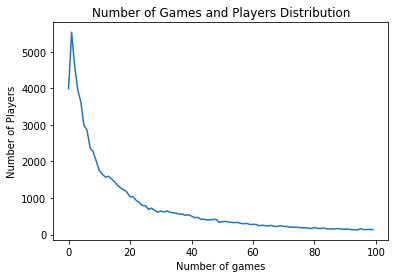

In [9]:
# Plotting the distribution of players that played 0 to 100 game rounds

ax = plot_df.head(100).plot(x = 'sum_gamerounds', y = 'userid');
ax.set_xlabel("Number of games");
ax.set_ylabel("Number of Players");
ax.set_title("Number of Games and Players Distribution");